<a href="https://colab.research.google.com/github/quetion/time-series-analysis_11102/blob/main/TS_Week14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from fredapi import Fred
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import yfinance as yf

In [6]:
# downlaod data from FRED
fred = Fred(api_key='584fea1d665ce20b977d543010478c44')
data = fred.get_series('USEPUINDXM')
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 460 entries, 1985-01-01 to 2023-04-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
460 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


<Axes: >

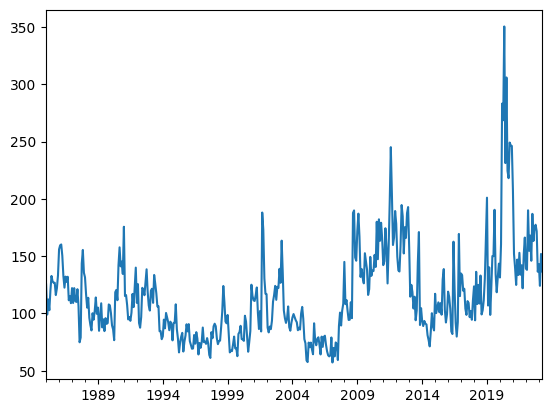

In [45]:
# data format : series (pandas)
# data: US EPU
data = fred.get_series_latest_release('USEPUINDXM')
#data.plot()
# data_1: CN EPU
data_1 = fred.get_series_latest_release('CHIEPUINDXM')
#data_1.info()

In [48]:
# data_2: BTC
data_2 = yf.download('BTC-USD',interval='1mo')
data_2 = pd.Series(data_2['Adj Close'])
data_2.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.series.Series'>
DatetimeIndex: 104 entries, 2014-10-01 to 2023-05-01
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
104 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [49]:
# combine several series into one DataFrame
data_m = pd.concat([data,data_1,data_2], axis=1)
data_m.columns = ['epu_us','epu_cn','btc']

In [50]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461 entries, 1985-01-01 to 2023-05-01
Freq: MS
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   epu_us  460 non-null    float64
 1   epu_cn  292 non-null    float64
 2   btc     104 non-null    float64
dtypes: float64(3)
memory usage: 14.4 KB


In [37]:
data_m.head()

,epu_us,epu_cn
1985-01-01,125.22474,NaN
1985-02-01,99.02081,NaN
1985-03-01,112.19051,NaN
1985-04-01,102.81132,NaN
1985-05-01,120.08272,NaN


In [ ]:
data